In [1]:
import numpy as np
from numpy import linalg as LA
import scipy as sp
import math 
import matplotlib.pyplot as plt

In [8]:
# Formation of the parameterized curve
N = 10000;
tt = np.linspace(0,2*np.pi,N)
x = 1.5 + 3*np.sin(tt) + 5*np.cos(2*tt)
y = 7*np.cos(tt)
s = np.array([x,y])

# Formation of the unit tangent and the outward unit normal
dxdt = 3*np.cos(tt)-10*np.sin(2*tt);
dydt = -7*np.sin(tt)
t = np.array([dxdt,dydt])/LA.norm([dxdt,dydt],axis=0)
n = np.array([-dydt,dxdt])/LA.norm([dxdt,dydt],axis=0)

# Grid formation
aa = int(np.amax([x,y]))
u = np.linspace(-aa,aa,2*aa+1)
v = np.linspace(-aa,aa,2*aa+1)
xx, yy = np.meshgrid(u,v)

# The charge, differential angle and arc length
q = 2*np.pi
dt = tt[1] - tt[0]
ds = np.sqrt(dxdt**2+dydt**2)*dt

In [9]:
# Algorithm implementation
inside = 0;
outside = 0;
Flux = np.zeros((2*aa+1,2*aa+1))

for j in range(0,2*aa+1):
    for k in range(0,2*aa+1):
        p = np.array([[xx[0,k]],[yy[j,0]]]) # position of point charge
        E = q*(s-p)/(2*np.pi*LA.norm(s-p,axis=0)**2) # Electric Field
        Flux[j,k] = sum((E[0]*n[0]+E[1]*n[1])*ds) # flux
        if Flux[j,k] >= q/2:
            inside += 1
        else:
            outside += 1
            
print('The number of points inside = ',inside)
print('The number of points outside = ',outside)

The number of points inside =  66
The number of points outside =  159


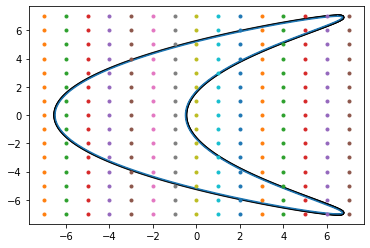

In [4]:
# Visualization
plt.plot(x,y) # plot of parameterized curve
plt.plot(xx,yy,'.') # plot of the grid
plt.quiver(x,y,n[0],n[1]) # plot of unit normal
plt.show()